**Lab 5 Time Series**

The Air Quality parameter chosen is PM10Conc which is the concentration of the PM10 throughout the whole 5 years from 2012-2016 in Terengganu. PM is particulate method that is having diamter of less than 10 μm, which is very small and cannot be seen by the naked eyes as it is even smaller than the size of a hair which is between 50μm-70μm. 

PM10 has always been used as an exposure indicator to the air quality as indicated by WHO. As we breathe, PM10 could enter our nose as it is suspended solid particles in the air. The hairs in the nostril trap it in the respiratory leading to lungs which could impact health.

PM10 is also the main parameter during haze and Air Pollutant Index (API) calculation. In Terengganu, a study revealed a higher PM10 concentration is due to heavy industrial activities, emission from automobile and aircrafts, Sumatra, Indonesia bush burning, construction sites, large industrial and commercial activities especially in Kemaman. 

Data Preparation for Trend

In [ ]:
import pandas as pd

data = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx')

print(data.sheet_names) #print sheet names in excel file

['2012', '2013', '2014', '2015', '2016']


Combine Multiple Excel Worksheets Into a Single Pandas Dataframe

In [ ]:
import pandas as pd
single_df =  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx', sheet_name='2012')
single_df.head()

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,100,0.006,0.5871,0.001,36.407,0.005
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,200,0.011,0.6128,0.001,37.875,0.006
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,300,0.015,0.6314,0.001,38.080,0.006
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,400,0.014,0.63,0.001,38.06,0.003
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,500,0.011,0.635,0.001,38.224,0.004


In [ ]:
all_dfs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx', sheet_name=None)

In [ ]:
type(all_dfs)

dict

In [ ]:
all_dfs.keys()

dict_keys(['2012', '2013', '2014', '2015', '2016'])

In [ ]:
all_dfs['2012'].head()

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,100,0.006,0.5871,0.001,36.407,0.005
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,200,0.011,0.6128,0.001,37.875,0.006
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,300,0.015,0.6314,0.001,38.080,0.006
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,400,0.014,0.63,0.001,38.06,0.003
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,500,0.011,0.635,0.001,38.224,0.004


In [ ]:
all_dfs['2013'].head()

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20130101,100,0.016,0.4625,0.0010,30.563,0.004
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20130101,200,0.015,0.4262,0.0010,29.840,0.003
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20130101,300,0.014,0.4075,0.0010,30.148,0.004
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20130101,400,0.014,0.3862,0.0010,30.178,0.002
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20130101,500,0.011,0.3537,0.0010,30.331,0.004


In [ ]:
for sheet in all_dfs:
    print(f"{sheet} - {all_dfs[sheet].shape}")

2012 - (26351, 9)
2013 - (26272, 9)
2014 - (26280, 9)
2015 - (26280, 9)
2016 - (26352, 9)


In [ ]:
df = pd.concat(all_dfs)
df.shape

(131535, 9)

In [ ]:
df.head()

SiteID                             Site_Location  ...  PM10Conc  NO2Conc
2012 0  CA0002  Sek. Ren. Keb. Bukit Kuang, Teluk Kalung  ...    36.407    0.005
     1  CA0002  Sek. Ren. Keb. Bukit Kuang, Teluk Kalung  ...    37.875    0.006
     2  CA0002  Sek. Ren. Keb. Bukit Kuang, Teluk Kalung  ...    38.080    0.006
     3  CA0002  Sek. Ren. Keb. Bukit Kuang, Teluk Kalung  ...     38.06    0.003
     4  CA0002  Sek. Ren. Keb. Bukit Kuang, Teluk Kalung  ...    38.224    0.004

[5 rows x 9 columns]

In [ ]:
df.tail()

SiteID                            Site_Location  ...  PM10Conc  NO2Conc
2016 26347  CA0034  Sek. Keb. Chabang Tiga Kuala Terengganu  ...    23.353      INS
     26348  CA0034  Sek. Keb. Chabang Tiga Kuala Terengganu  ...    22.838      INS
     26349  CA0034  Sek. Keb. Chabang Tiga Kuala Terengganu  ...    21.990      INS
     26350  CA0034  Sek. Keb. Chabang Tiga Kuala Terengganu  ...    21.875      INS
     26351  CA0034  Sek. Keb. Chabang Tiga Kuala Terengganu  ...    21.810      INS

[5 rows x 9 columns]

Since the head and tail shows the index number is same as in their respective sheets, the code below will change index and can describe as a single dataframe

In [ ]:
pd.concat(pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx', sheet_name=None), ignore_index=True)

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,100,0.006,0.5871,0.001,36.407,0.005
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,200,0.011,0.6128,0.001,37.875,0.006
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,300,0.015,0.6314,0.001,38.080,0.006
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,400,0.014,0.63,0.001,38.06,0.003
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",20120101,500,0.011,0.635,0.001,38.224,0.004
...,...,...,...,...,...,...,...,...,...
131530,CA0034,Sek. Keb. Chabang Tiga Kuala Terengganu,20161231,2000,0.012,NaN,INS,23.353,INS
131531,CA0034,Sek. Keb. Chabang Tiga Kuala Terengganu,20161231,2100,0.013,NaN,INS,22.838,INS
131532,CA0034,Sek. Keb. Chabang Tiga Kuala Terengganu,20161231,2200,0.01,NaN,INS,21.990,INS
131533,CA0034,Sek. Keb. Chabang Tiga Kuala Terengganu,20161231,2300,0.009,NaN,INS,21.875,INS


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu.csv',index = False)

# Treat Missing Values using Forward Fill method

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
#read / load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu.csv', parse_dates=['Date'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131535 entries, 0 to 131534
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   SiteID         131535 non-null  object        
 1   Site_Location  131535 non-null  object        
 2   Date           131535 non-null  datetime64[ns]
 3   Time           131535 non-null  int64         
 4   O3Conc         81049 non-null   object        
 5   COConc         78289 non-null   object        
 6   SO2Conc        101715 non-null  object        
 7   PM10Conc       131360 non-null  object        
 8   NO2Conc        119017 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 9.0+ MB


In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)
df['PM10Conc'].fillna(method='ffill', inplace=True)
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/test.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131535 entries, 0 to 131534
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   SiteID         131535 non-null  object        
 1   Site_Location  131535 non-null  object        
 2   Date           131535 non-null  datetime64[ns]
 3   Time           131535 non-null  int64         
 4   O3Conc         81049 non-null   object        
 5   COConc         78289 non-null   object        
 6   SO2Conc        101715 non-null  object        
 7   PM10Conc       131535 non-null  object        
 8   NO2Conc        119017 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 9.0+ MB


In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', parse_dates=['Date'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The plot shows PM10 concentration throughout the 5 years that it has an upward and downward trend. In 2013, it has the highest peak of PM10 which is almost 400 µg/m³, very unhealthy followed by 2015 and 2014. The year 2012 and 2016 shows large variation throughout the years but become smaller towards the end of the year. It seems the trend at the end of each year is decreasing, the air quality is good as its PM10 concentration is around 50 µg/m³. This can be describe more when plotting seasonality by month throughout the years.

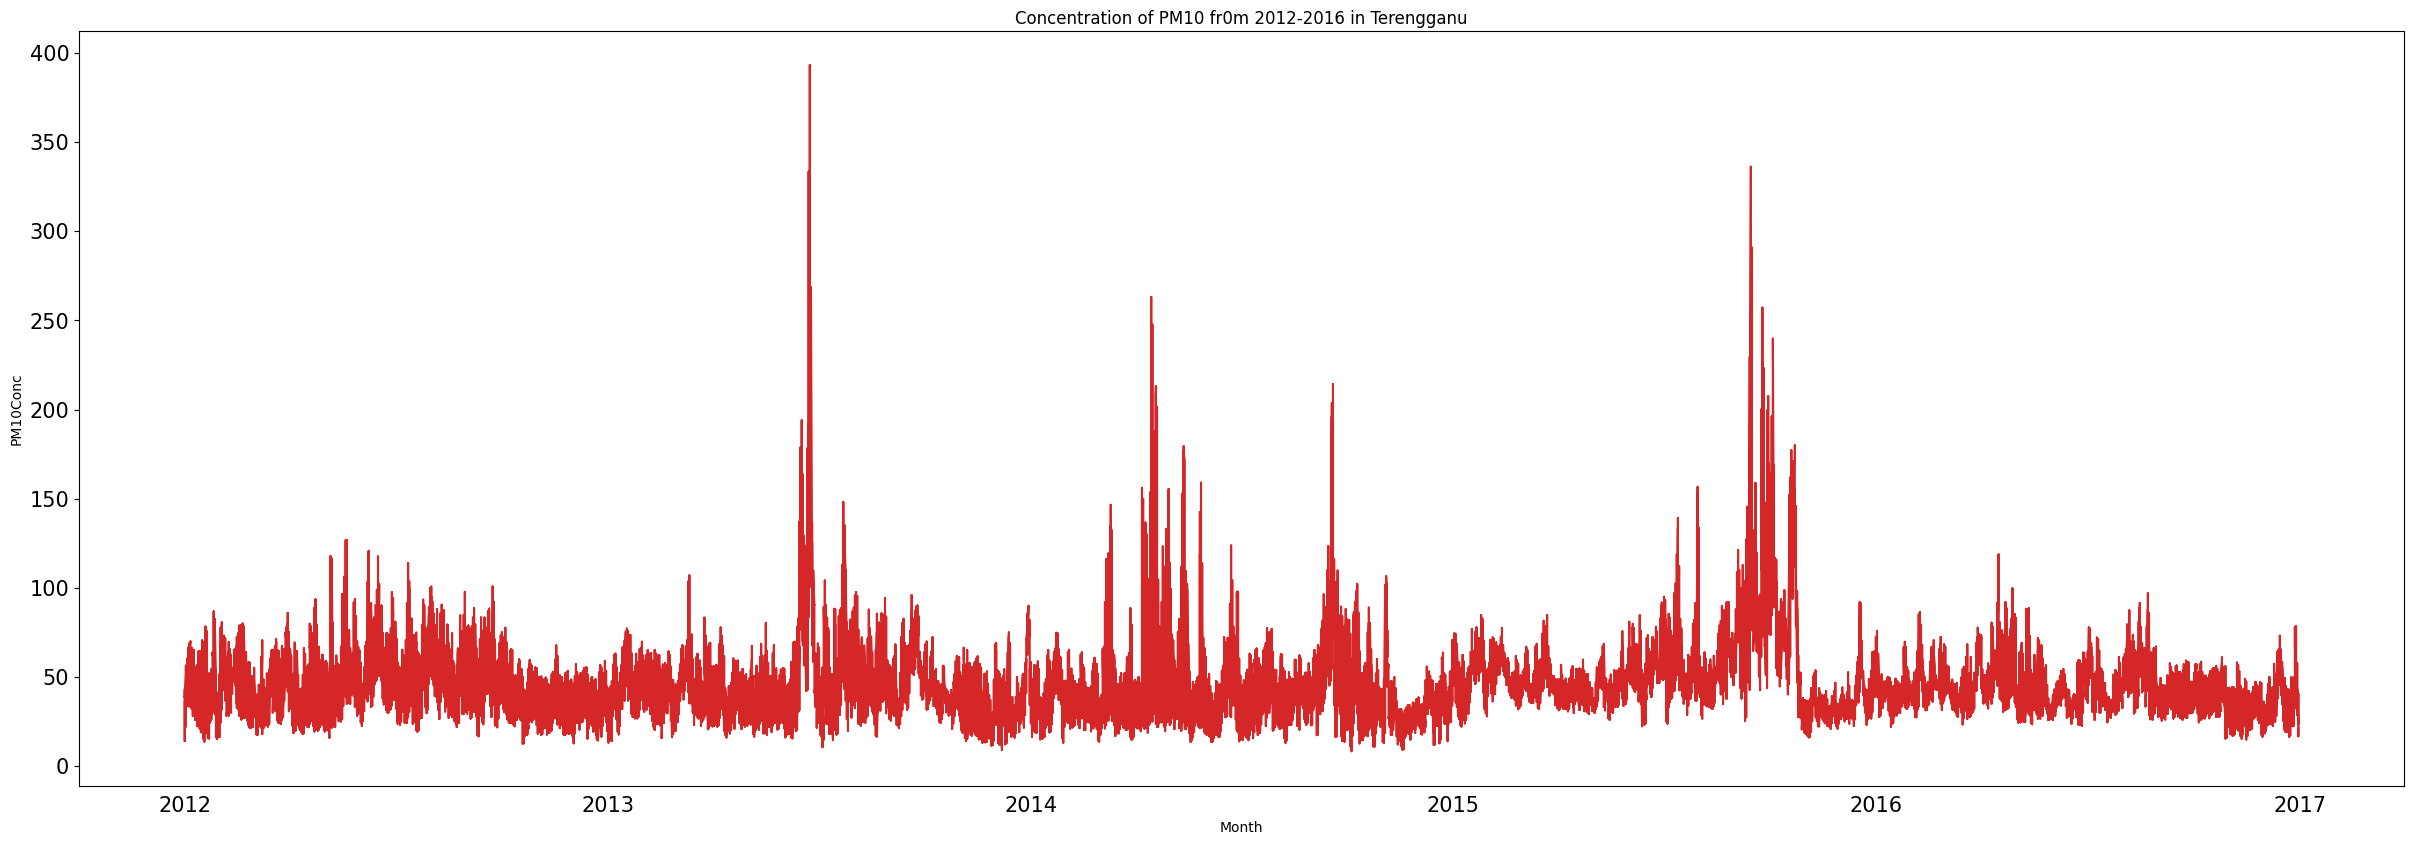

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(30,10), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 fr0m 2012-2016 in Terengganu', xlabel='Month', ylabel='PM10Conc')
    plt.yticks(fontsize=15, alpha=2)
    plt.xticks(fontsize=15, alpha=2)
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)
df = df.sort_values(['Date'], ascending=[True])

# Data Preparation for Seasonality

In [ ]:
import pandas as pd

data = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx')

print(data.sheet_names) #print sheet names in excel file

['2012', '2013', '2014', '2015', '2016']


In [ ]:
# I prefer reading excel with pd.read_excel
# passing `sheet_name=None` returns a dictionary 
# with the form {sheet_name: dataframe}
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu_Hourly.xlsx', sheet_name=None)

# loop through the dictionary and save csv
for sheet_name, df in data.items():
    df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu {sheet_name}.csv', index=False)

In [ ]:
from dateutil.parser import parse #3
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
#read / load data 4
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu 2012.csv', parse_dates=['Date'])
df.head()

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2012-01-01,100,0.006,0.5871,0.001,36.407,0.005
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2012-01-01,200,0.011,0.6128,0.001,37.875,0.006
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2012-01-01,300,0.015,0.6314,0.001,38.080,0.006
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2012-01-01,400,0.014,0.63,0.001,38.06,0.003
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2012-01-01,500,0.011,0.635,0.001,38.224,0.004


In [ ]:
df.isna().any()#5

SiteID           False
Site_Location    False
Date             False
Time             False
O3Conc            True
COConc            True
SO2Conc           True
PM10Conc         False
NO2Conc           True
dtype: bool

In [ ]:
df.loc[11791:11806,:]#6

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
11791,CA0024,"Kuarters TNB, Paka",2012-05-05,800,NaN,NaN,INS,INS,PFL
11792,CA0024,"Kuarters TNB, Paka",2012-05-05,900,NaN,NaN,INS,INS,PFL
11793,CA0024,"Kuarters TNB, Paka",2012-05-05,1000,NaN,NaN,INS,INS,0.007
11794,CA0024,"Kuarters TNB, Paka",2012-05-05,1100,NaN,NaN,INS,INS,0.003
11795,CA0024,"Kuarters TNB, Paka",2012-05-05,1200,NaN,NaN,INS,INS,0.003
11796,CA0024,"Kuarters TNB, Paka",2012-05-05,1300,NaN,NaN,INS,INS,0.003
11797,CA0024,"Kuarters TNB, Paka",2012-05-05,1400,NaN,NaN,INS,INS,0.003
11798,CA0024,"Kuarters TNB, Paka",2012-05-05,1500,NaN,NaN,INS,INS,0.022
11799,CA0024,"Kuarters TNB, Paka",2012-05-05,1600,NaN,NaN,INS,INS,0.007
11800,CA0024,"Kuarters TNB, Paka",2012-05-05,1700,NaN,NaN,INS,INS,0.003


Column PM10Conc has INS in its column which does not indicate any value of measurements, hence it is replace to NaN as the code below. The missing values will be treated.

In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)#7

In [ ]:
df.loc[11791:11806,:]#checking whether it is change to NaN

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
11791,CA0024,"Kuarters TNB, Paka",2012-05-05,800,NaN,NaN,INS,NaN,PFL
11792,CA0024,"Kuarters TNB, Paka",2012-05-05,900,NaN,NaN,INS,NaN,PFL
11793,CA0024,"Kuarters TNB, Paka",2012-05-05,1000,NaN,NaN,INS,NaN,0.007
11794,CA0024,"Kuarters TNB, Paka",2012-05-05,1100,NaN,NaN,INS,NaN,0.003
11795,CA0024,"Kuarters TNB, Paka",2012-05-05,1200,NaN,NaN,INS,NaN,0.003
11796,CA0024,"Kuarters TNB, Paka",2012-05-05,1300,NaN,NaN,INS,NaN,0.003
11797,CA0024,"Kuarters TNB, Paka",2012-05-05,1400,NaN,NaN,INS,NaN,0.003
11798,CA0024,"Kuarters TNB, Paka",2012-05-05,1500,NaN,NaN,INS,NaN,0.022
11799,CA0024,"Kuarters TNB, Paka",2012-05-05,1600,NaN,NaN,INS,NaN,0.007
11800,CA0024,"Kuarters TNB, Paka",2012-05-05,1700,NaN,NaN,INS,NaN,0.003


In [ ]:
df.info()#now the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26351 non-null  object        
 1   Site_Location  26351 non-null  object        
 2   Date           26351 non-null  datetime64[ns]
 3   Time           26351 non-null  int64         
 4   O3Conc         17567 non-null  object        
 5   COConc         17567 non-null  object        
 6   SO2Conc        15096 non-null  object        
 7   PM10Conc       26038 non-null  object        
 8   NO2Conc        21129 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


# Treat missing values with Forward Fill method

In [ ]:
df['PM10Conc'].fillna(method='ffill', inplace=True)


In [ ]:
df.loc[11791:11806,:]#shows the missing value replaced

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
11791,CA0024,"Kuarters TNB, Paka",2012-05-05,800,NaN,NaN,INS,15.712,PFL
11792,CA0024,"Kuarters TNB, Paka",2012-05-05,900,NaN,NaN,INS,15.712,PFL
11793,CA0024,"Kuarters TNB, Paka",2012-05-05,1000,NaN,NaN,INS,15.712,0.007
11794,CA0024,"Kuarters TNB, Paka",2012-05-05,1100,NaN,NaN,INS,15.712,0.003
11795,CA0024,"Kuarters TNB, Paka",2012-05-05,1200,NaN,NaN,INS,15.712,0.003
11796,CA0024,"Kuarters TNB, Paka",2012-05-05,1300,NaN,NaN,INS,15.712,0.003
11797,CA0024,"Kuarters TNB, Paka",2012-05-05,1400,NaN,NaN,INS,15.712,0.003
11798,CA0024,"Kuarters TNB, Paka",2012-05-05,1500,NaN,NaN,INS,15.712,0.022
11799,CA0024,"Kuarters TNB, Paka",2012-05-05,1600,NaN,NaN,INS,15.712,0.007
11800,CA0024,"Kuarters TNB, Paka",2012-05-05,1700,NaN,NaN,INS,15.712,0.003


In [ ]:
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2012.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26351 non-null  object        
 1   Site_Location  26351 non-null  object        
 2   Date           26351 non-null  datetime64[ns]
 3   Time           26351 non-null  int64         
 4   O3Conc         17567 non-null  object        
 5   COConc         17567 non-null  object        
 6   SO2Conc        15096 non-null  object        
 7   PM10Conc       26351 non-null  object        
 8   NO2Conc        21129 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


Plotting with treated missing values

In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2012.csv', parse_dates=['Date'])

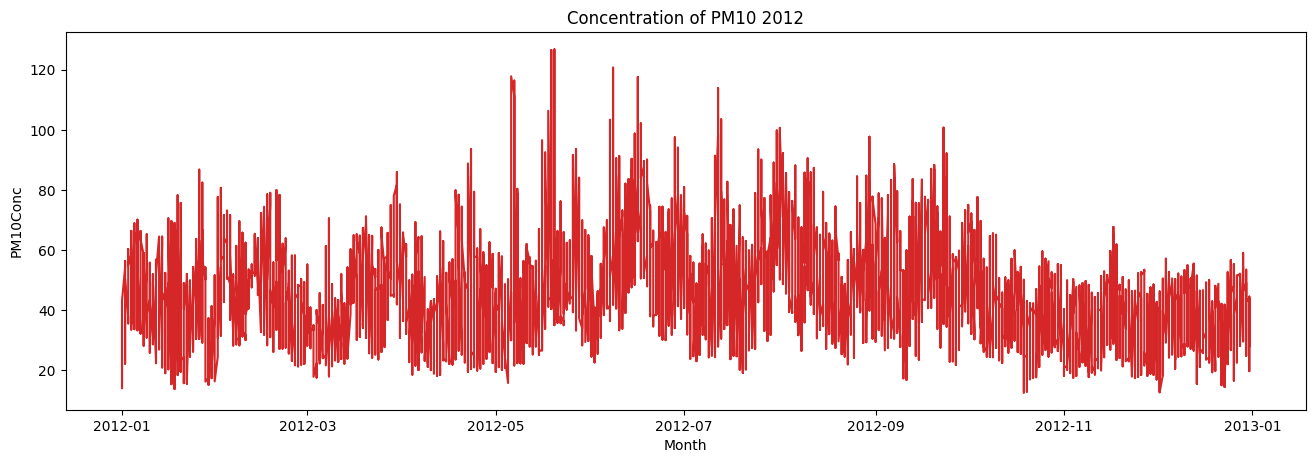

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 2012', xlabel='Month', ylabel='PM10Conc')
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)   
df = df.sort_values(['Date'], ascending=[True])

# Smoothing code 

It is shown on 2012, the trend is highest of PM10Conc in the middle of the year between June and September and starts to fluctuate towards the end of the year. The month June highest peak followed by month July. Haze occurs on the dry period of June to August 2012. It is a result of forest fire from Sumatra, Indonesia.

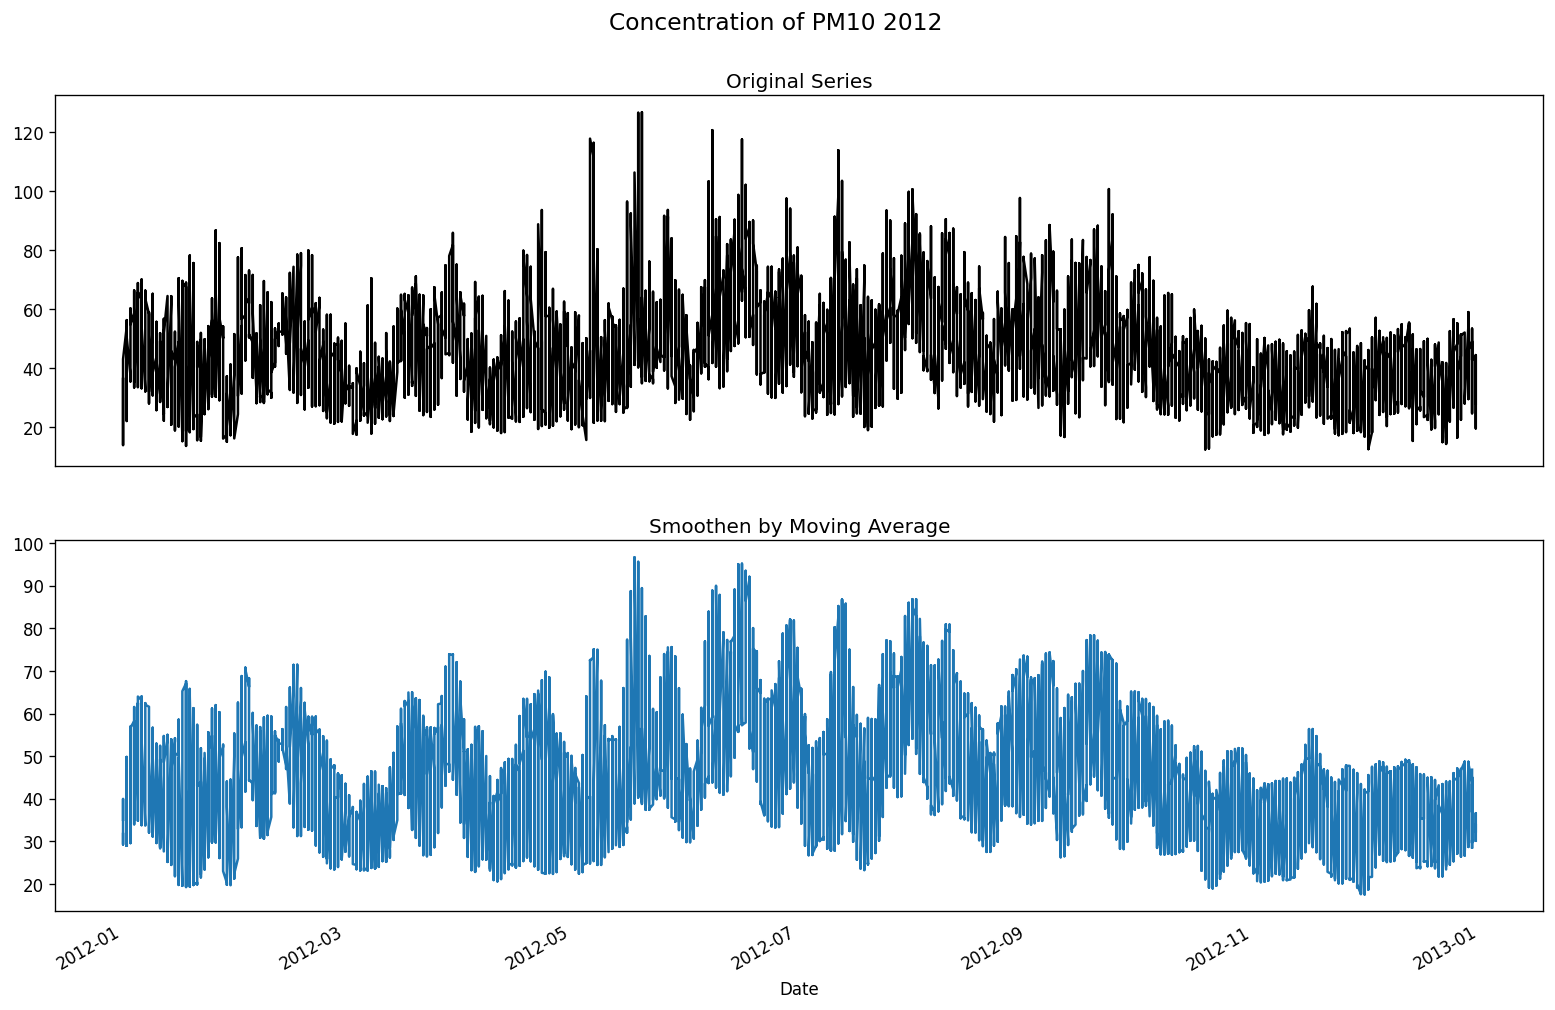

In [ ]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2012.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig.PM10Conc.rolling(95, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(16, 10), sharex=True, dpi=120)
df_orig['PM10Conc'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Smoothen by Moving Average')
fig.suptitle('Concentration of PM10 2012', y=0.95, fontsize=14)
plt.show()

From this section onwards, same code will be applied for treating missing values using forward fill method in PM10Conc column for the year 2013-2016.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu 2013.csv', parse_dates=['Date'])
df.head()

,SiteID,Site_Location,Date,Time,O3Conc,COConc,SO2Conc,PM10Conc,NO2Conc
0,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2013-01-01,100,0.016,0.4625,0.0010,30.563,0.004
1,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2013-01-01,200,0.015,0.4262,0.0010,29.840,0.003
2,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2013-01-01,300,0.014,0.4075,0.0010,30.148,0.004
3,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2013-01-01,400,0.014,0.3862,0.0010,30.178,0.002
4,CA0002,"Sek. Ren. Keb. Bukit Kuang, Teluk Kalung",2013-01-01,500,0.011,0.3537,0.0010,30.331,0.004


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26272 entries, 0 to 26271
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26272 non-null  object        
 1   Site_Location  26272 non-null  object        
 2   Date           26272 non-null  datetime64[ns]
 3   Time           26272 non-null  int64         
 4   O3Conc         17520 non-null  object        
 5   COConc         16783 non-null  object        
 6   SO2Conc        13901 non-null  object        
 7   PM10Conc       26272 non-null  object        
 8   NO2Conc        18976 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)#7

In [ ]:
df['PM10Conc'].fillna(method='ffill', inplace=True)

In [ ]:
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2013.csv',index=False)

In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2013.csv', parse_dates=['Date'])

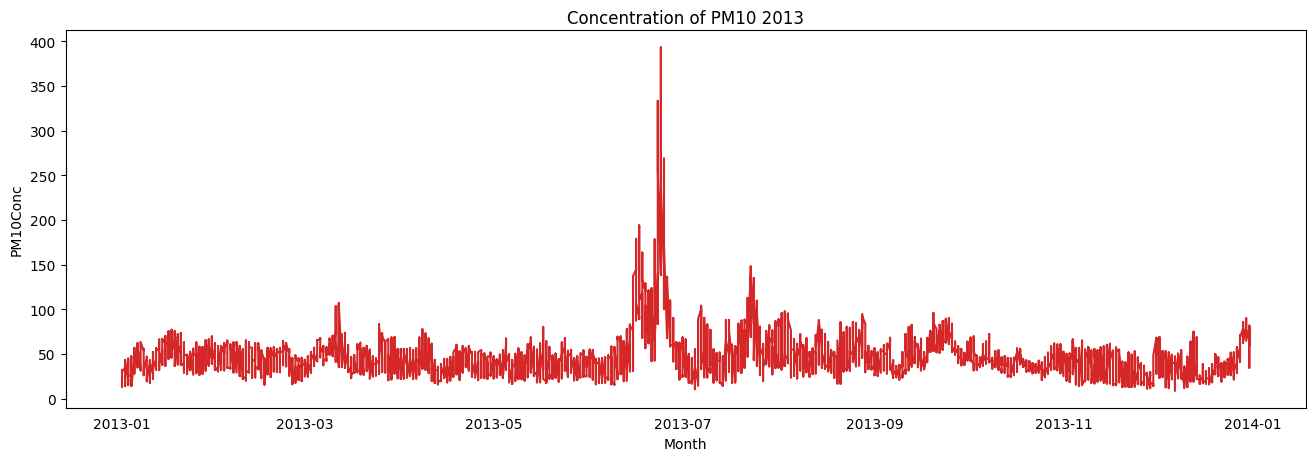

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 2013', xlabel='Month', ylabel='PM10Conc')
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)
df = df.sort_values(['Date'], ascending=[True])


It is shown on 2013, the trend is highest of PM10Conc in the middle of the year between June and July and starts to fluctuate towards the end of the year. The month June at highest peak and very high which is almost 400 µg/m3 showing a very bad API. 2013 was known to have the worst haze in Southeast Asian countries. On 19th June 2013, illegal wildfires from Sumatra causes thick clouds of haze in the region. On 24th June 2013, Terengganu was recorded as one of the hotspot that's affected.

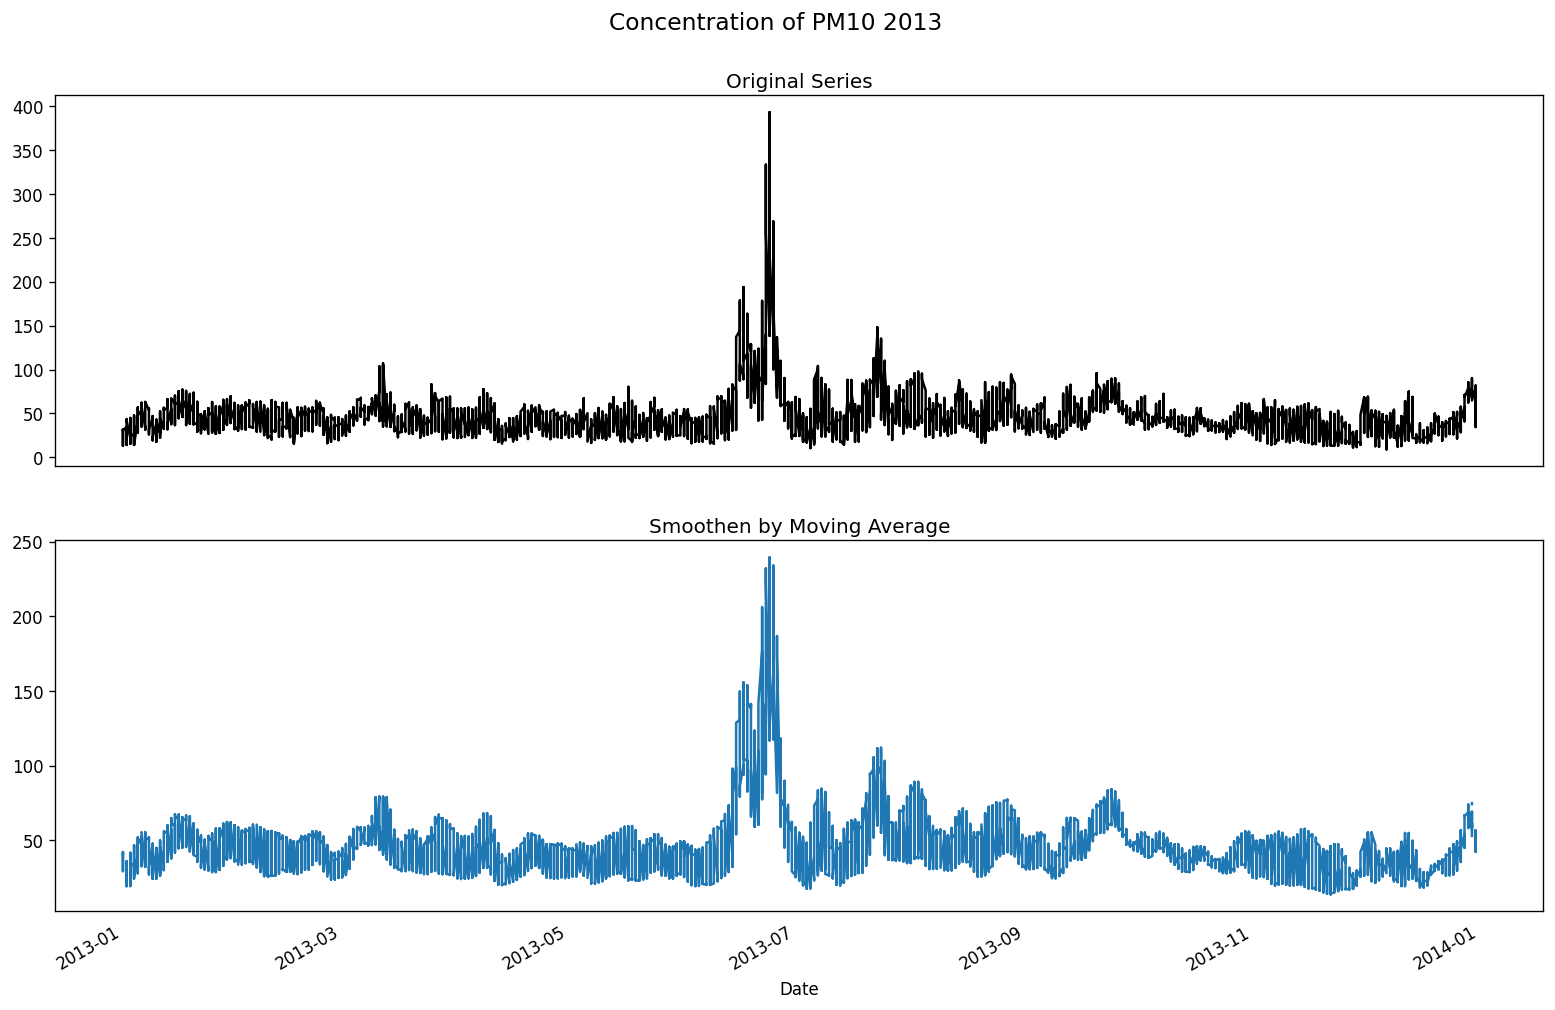

In [ ]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2013.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig.PM10Conc.rolling(90, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(16, 10), sharex=True, dpi=120)
df_orig['PM10Conc'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Smoothen by Moving Average')
fig.suptitle('Concentration of PM10 2013', y=0.95, fontsize=14)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu 2014.csv', parse_dates=['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26280 non-null  object        
 1   Site_Location  26280 non-null  object        
 2   Date           26280 non-null  datetime64[ns]
 3   Time           26280 non-null  int64         
 4   O3Conc         14770 non-null  object        
 5   COConc         16489 non-null  object        
 6   SO2Conc        23506 non-null  object        
 7   PM10Conc       26105 non-null  object        
 8   NO2Conc        26280 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)
df['PM10Conc'].fillna(method='ffill', inplace=True)
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2014.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26280 non-null  object        
 1   Site_Location  26280 non-null  object        
 2   Date           26280 non-null  datetime64[ns]
 3   Time           26280 non-null  int64         
 4   O3Conc         14770 non-null  object        
 5   COConc         16489 non-null  object        
 6   SO2Conc        23506 non-null  object        
 7   PM10Conc       26280 non-null  object        
 8   NO2Conc        26280 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2014.csv', parse_dates=['Date'])


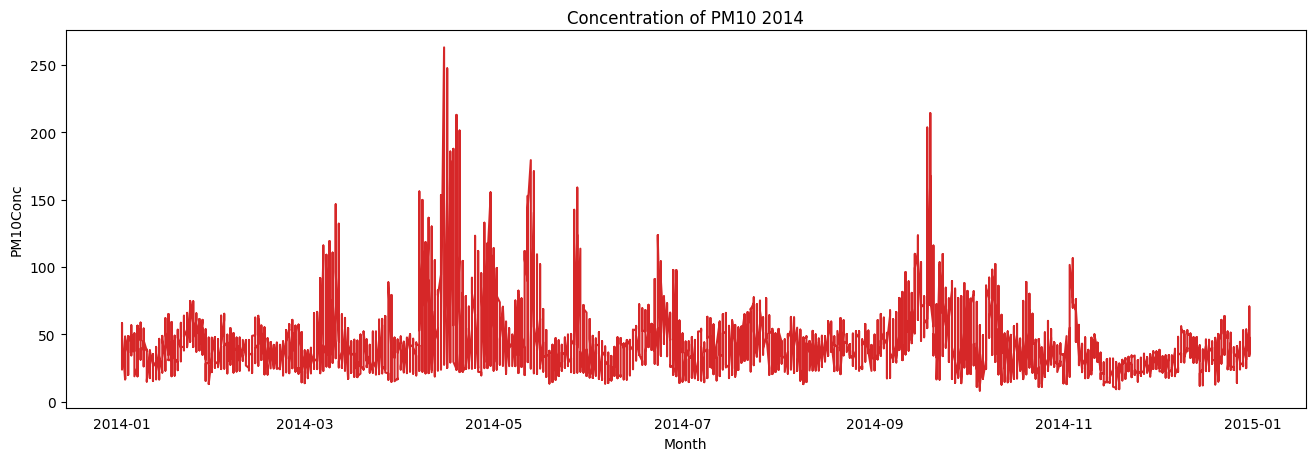

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 2014', xlabel='Month', ylabel='PM10Conc')
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)
df = df.sort_values(['Date'], ascending=[True])

It is shown on 2014, the trend is highest of PM10Conc in the middle of the year between April and July and rise again on September. It then starts to fluctuate towards the end of the year. The month April at highest peak. On February to March 2014, it was reported that dry season contribute more to worsen API since forest and peatland fires happened in Terengganu according to Department of Environment. 

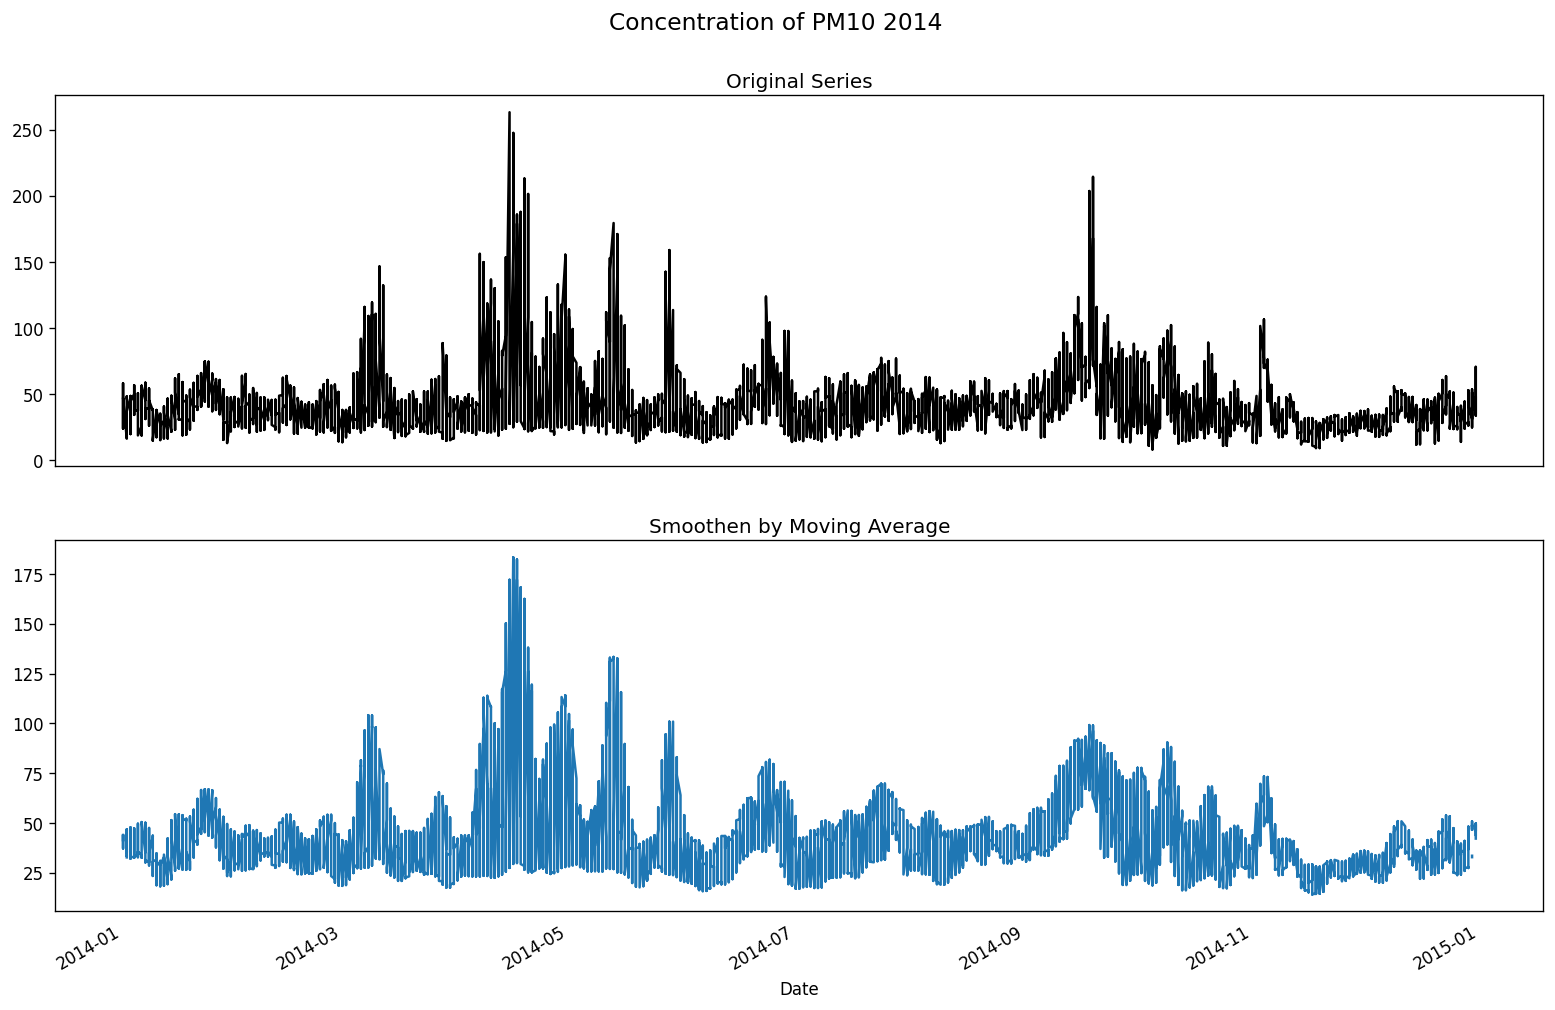

In [ ]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2014.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig.PM10Conc.rolling(90, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(16, 10), sharex=True, dpi=120)
df_orig['PM10Conc'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Smoothen by Moving Average')
fig.suptitle('Concentration of PM10 2014', y=0.95, fontsize=14)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu 2015.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26280 non-null  object        
 1   Site_Location  26280 non-null  object        
 2   Date           26280 non-null  datetime64[ns]
 3   Time           26280 non-null  int64         
 4   O3Conc         13624 non-null  object        
 5   COConc         13928 non-null  object        
 6   SO2Conc        26280 non-null  object        
 7   PM10Conc       26280 non-null  object        
 8   NO2Conc        26280 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)
df['PM10Conc'].fillna(method='ffill', inplace=True)
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2015.csv',index=False)

In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2015.csv', parse_dates=['Date'])

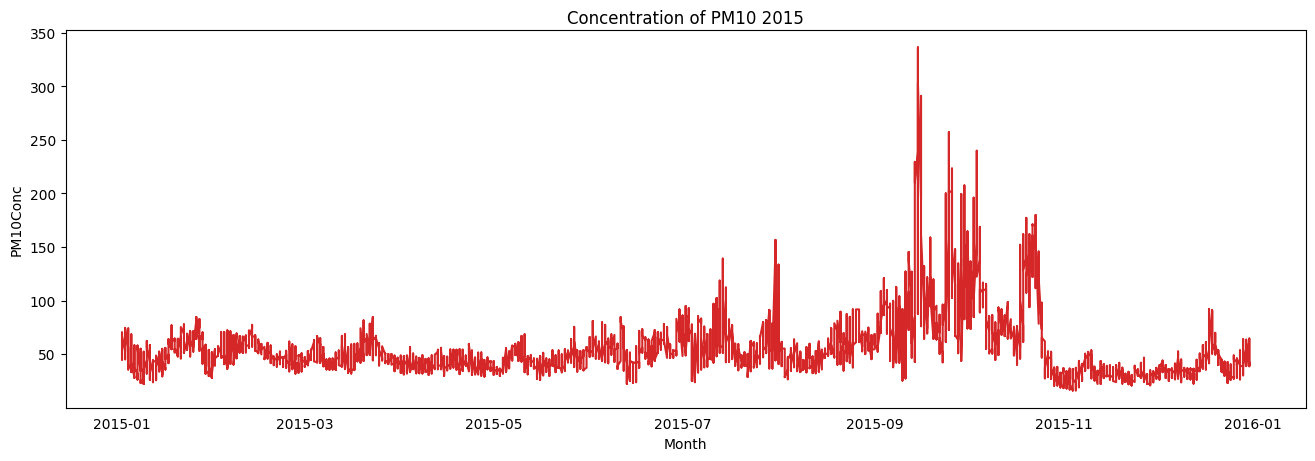

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 2015', xlabel='Month', ylabel='PM10Conc')
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)
df = df.sort_values(['Date'], ascending=[True])

It is shown on 2015, the trend is highest of PM10Conc almost at the end of the year between July and November and fluctuate towards the end of the year. The month September at highest peak. On September 2015, air quality worsens due to land and forest fires in Sumatra and Kalimantan, Indonesia. This expains the spike on September 2015 from the plot. 

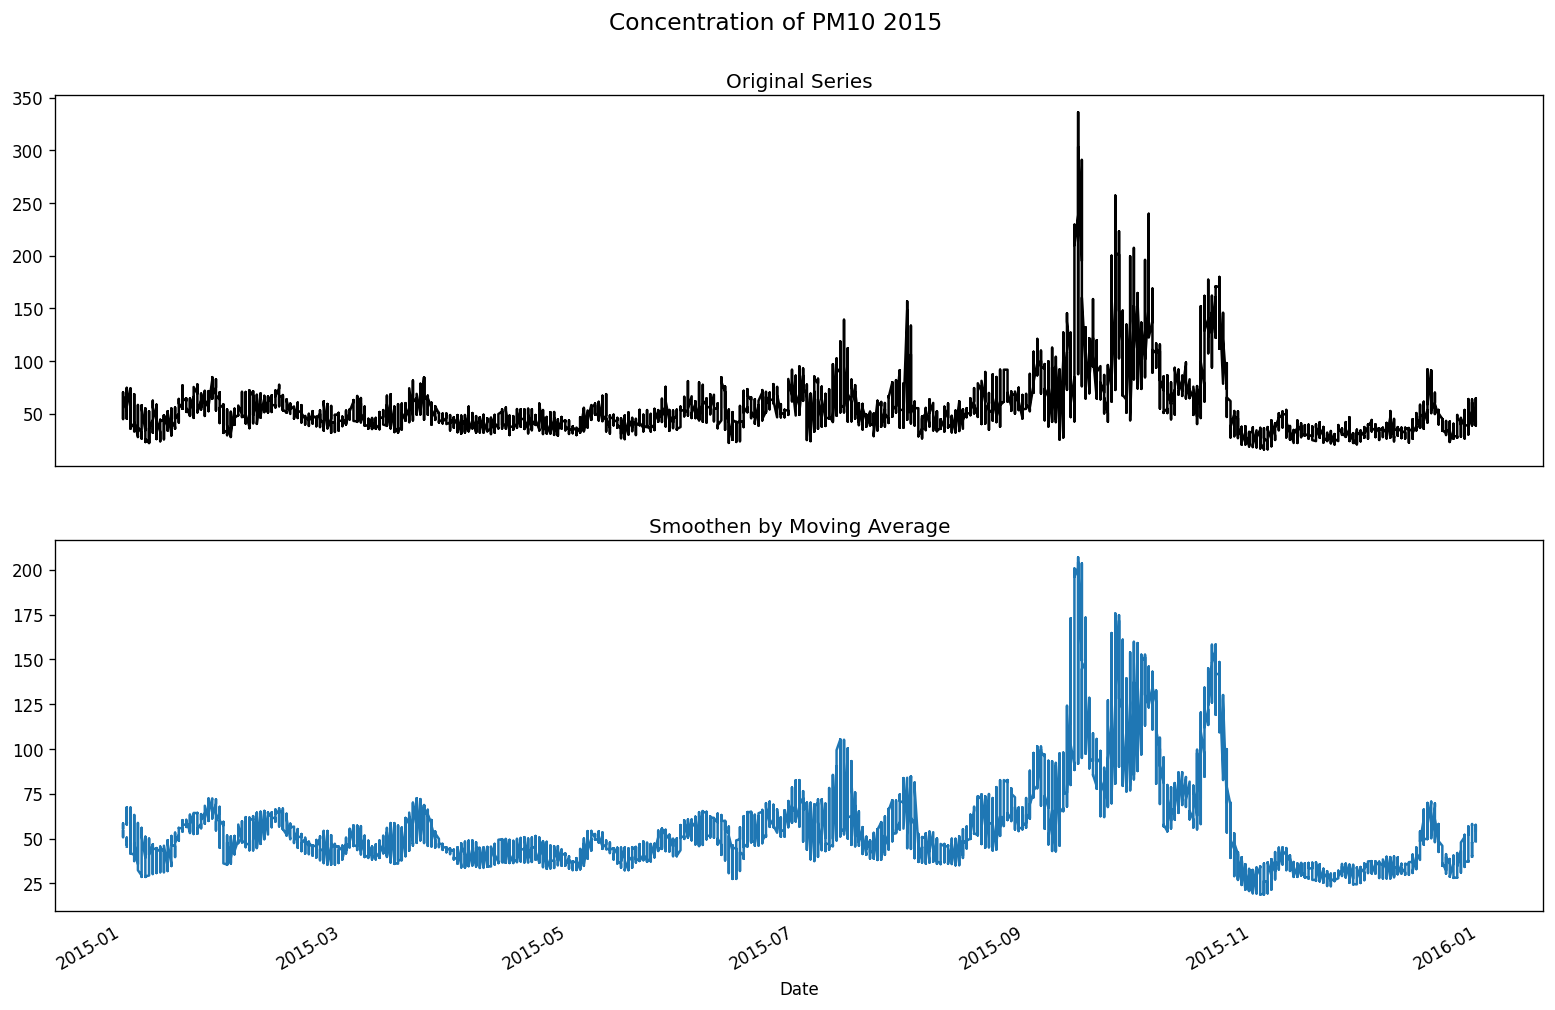

In [ ]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2015.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig.PM10Conc.rolling(90, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(16, 10), sharex=True, dpi=120)
df_orig['PM10Conc'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Smoothen by Moving Average')
fig.suptitle('Concentration of PM10 2015', y=0.95, fontsize=14)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/Terengganu 2016.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26352 entries, 0 to 26351
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteID         26352 non-null  object        
 1   Site_Location  26352 non-null  object        
 2   Date           26352 non-null  datetime64[ns]
 3   Time           26352 non-null  int64         
 4   O3Conc         17568 non-null  object        
 5   COConc         13522 non-null  object        
 6   SO2Conc        22932 non-null  object        
 7   PM10Conc       26352 non-null  object        
 8   NO2Conc        26352 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
df['PM10Conc'] = df['PM10Conc'].replace('INS', np.nan)
df['PM10Conc'].fillna(method='ffill', inplace=True)
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2016.csv',index=False)

In [ ]:
#read / load data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2016.csv', parse_dates=['Date'])

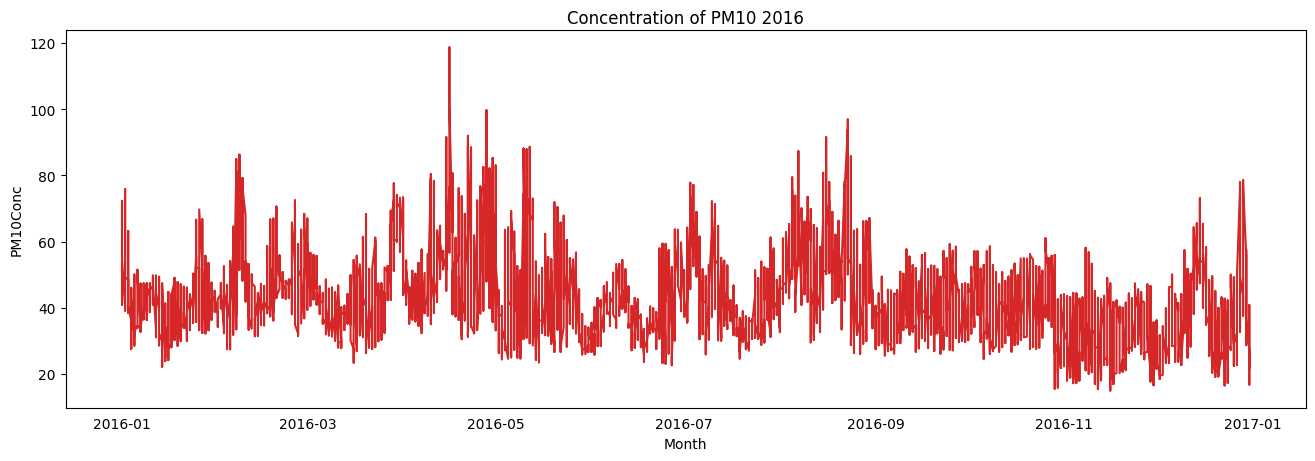

In [ ]:
# Draw Plot
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Month', ylabel='PM10Conc', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title='Concentration of PM10 2016', xlabel='Month', ylabel='PM10Conc')
    plt.show()

plot_df(df, x=df.Date, y=df.PM10Conc)
df = df.sort_values(['Date'], ascending=[True])

It is shown on 2016, the trend is highest of PM10Conc almost at the end of the year between April and September and fluctuate towards the end of the year. The month April at highest peak. On August 2016, haze was cause by illegal agricultural fires from Sumatra, Indonesia. It explains the second highest peak of PM10Conc on September 2016 from plot.  

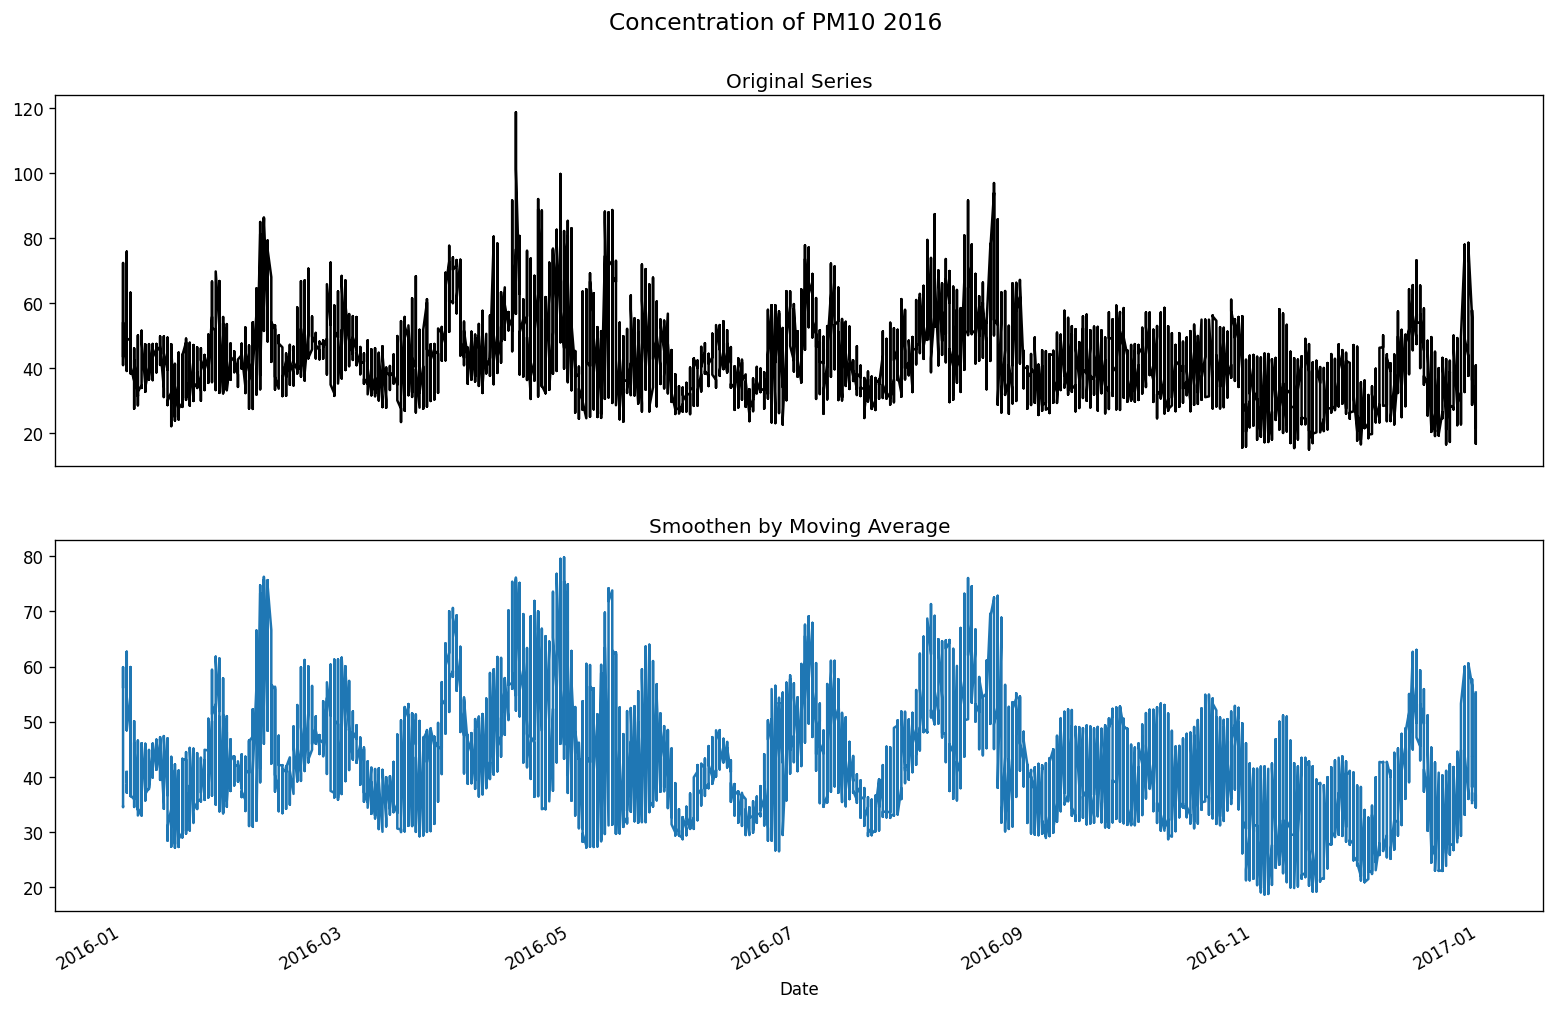

In [ ]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab Day 5/2016.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig.PM10Conc.rolling(80, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(16, 10), sharex=True, dpi=120)
df_orig['PM10Conc'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Smoothen by Moving Average')
fig.suptitle('Concentration of PM10 2016', y=0.95, fontsize=14)
plt.show()

The seasonal pattern shown from PM10Conc plotted throughout the 5 years is between the month June to September where in between those months, June must be listed as one of the highest polluted air quality measured by PM10. June also reach its highest peak of PM10Conc visualize from the 2013 plot. Such in 2015, the peak spiked in September due to the haze from forest fires in Sumatra, Indonesia occuring at a different time than usual of June. 

The seasonal pattern also occurs between June to September due to industrial area such as the PM10 measurement was taken at Paka, Terengganu which is a large industrial area of oil and gas. Forest and peatland fires also occurs on 2014 in Terengganu. Forest fires, haze, industrial all contributes to the air quality that worsens in the middle of the year between June and September. This is also due the dry season that occurs at the same time with the haze that's happening causing PM10Conc to be higher. A result from a study shows that there was peak of PM10 observed in June at Kuala Terengganu. This is due to the southwest monsoon that occurred in Malaysia where the dry season started. Soutwest monsoon usually starts from June to September. 

# Box plot

All the box plots for years shows a normal distribution except in 2015 where it is skewed to the right as the data distribution of Q3 is higher than Q2 as September spikes of reading in 2015 unlike the other years. 

Boxplots that shows the highest outliers such as month June to September are due to the haze occuring and highest PM10Conc such as in 2013. 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


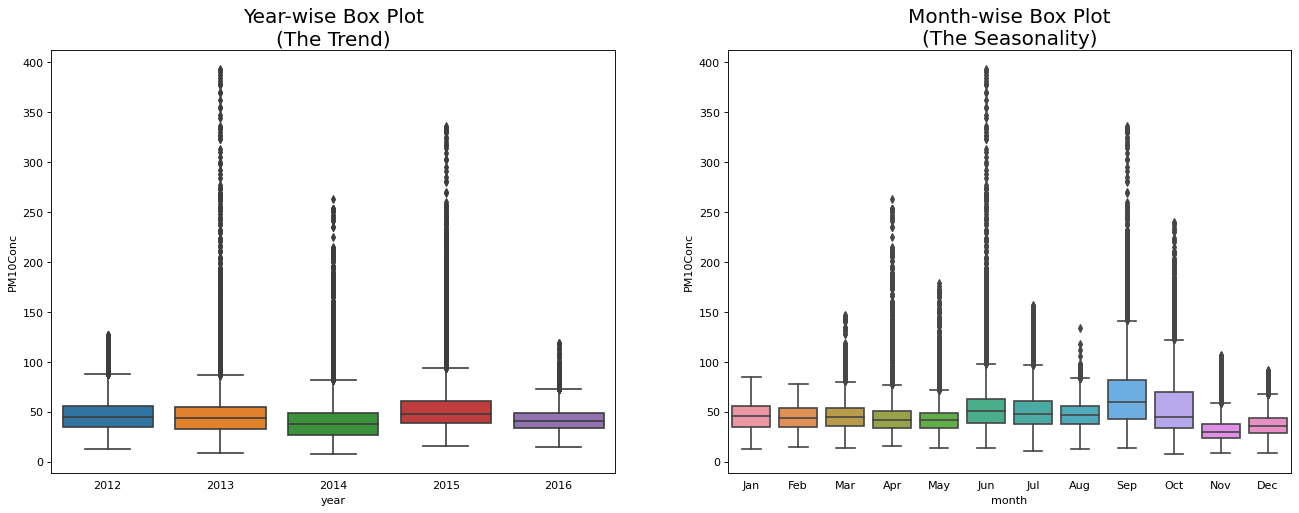

In [ ]:
# Import Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Prepare data  --> what is this for? does your data have diff column for year, month and day for date?
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PM10Conc', data=df, ax=axes[0])
sns.boxplot(x='month', y='PM10Conc', data=df.loc[~df.year.isin([2012, 2016]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()